In [1]:
# import required libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [3]:
# load and read dataset
dataset = pd.read_csv('ice_cream_sales.csv')
dataset.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [4]:
# find info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [5]:
# decribe dataset further
dataset.describe()

,Temperature,Ice Cream Profits
count,365.000000,365.000000
mean,71.980822,52.103616
std,13.258510,15.989004
min,39.000000,11.880000
25%,63.000000,40.650000
50%,73.000000,53.620000
75%,82.000000,63.630000
max,101.000000,89.290000


In [6]:
# find null values if any
dataset.isnull().sum()

Temperature          0
Ice Cream Profits    0
dtype: int64

In [7]:
# all columns
dataset.columns

Index(['Temperature', 'Ice Cream Profits'], dtype='object')

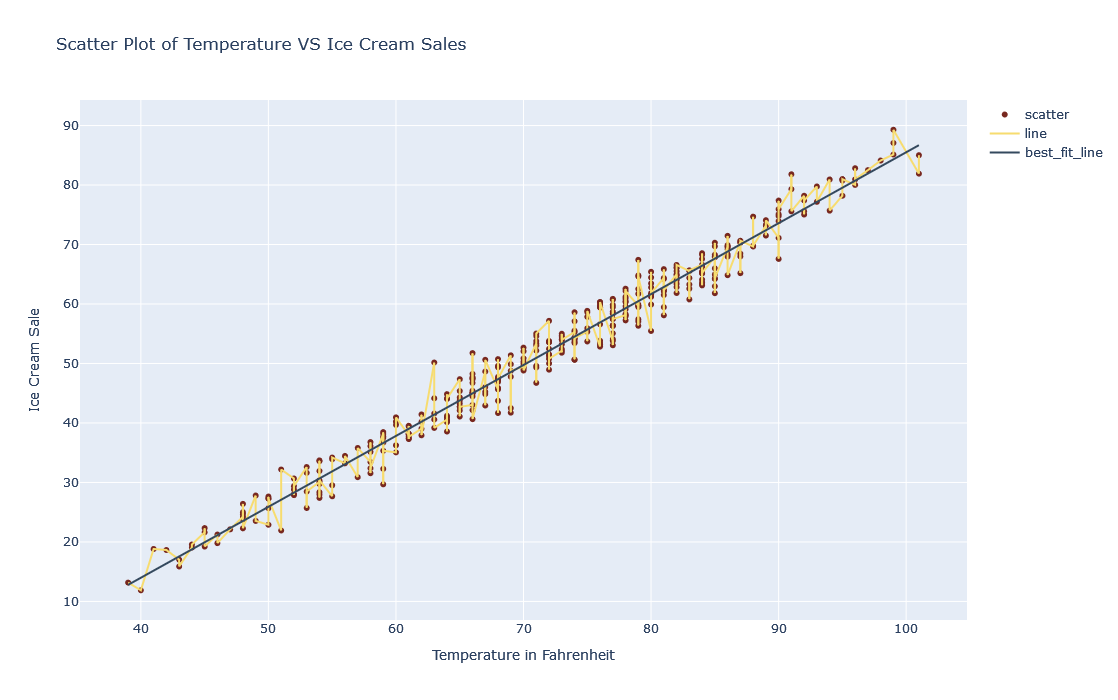

In [27]:
# now use plotly to draw a scatter plot

slope, intercept = np.polyfit(dataset['Temperature'], dataset['Ice Cream Profits'], 1)

best_fit_line = slope * dataset['Temperature'] + intercept

fig = go.Figure()

fig.add_trace(go.Scatter(x = dataset['Temperature'], y = dataset['Ice Cream Profits'], marker = dict(color = '#78281f'), mode = 'markers', name='scatter'))
fig.add_trace(go.Scatter(x = dataset['Temperature'], y = dataset['Ice Cream Profits'], mode = 'lines', marker = dict(color = '#f7dc6f'), name = 'line'))
fig.add_trace(go.Scatter(x = dataset['Temperature'], y = best_fit_line, mode = 'lines', name = 'best_fit_line', marker = dict(color = '#34495e')))
fig.update_layout(title = 'Scatter Plot of Temperature VS Ice Cream Sales', xaxis_title = 'Temperature in Fahrenheit', yaxis_title = 'Ice Cream Sale')
fig.update_layout(height = 700, width = 1100)
fig.show()

In [31]:
# now lets find correlation between both variables
x = dataset['Temperature']
y = dataset['Ice Cream Profits']

cor = x.corr(y)
print("The correlation is", cor)

The correlation is 0.9884457224209474


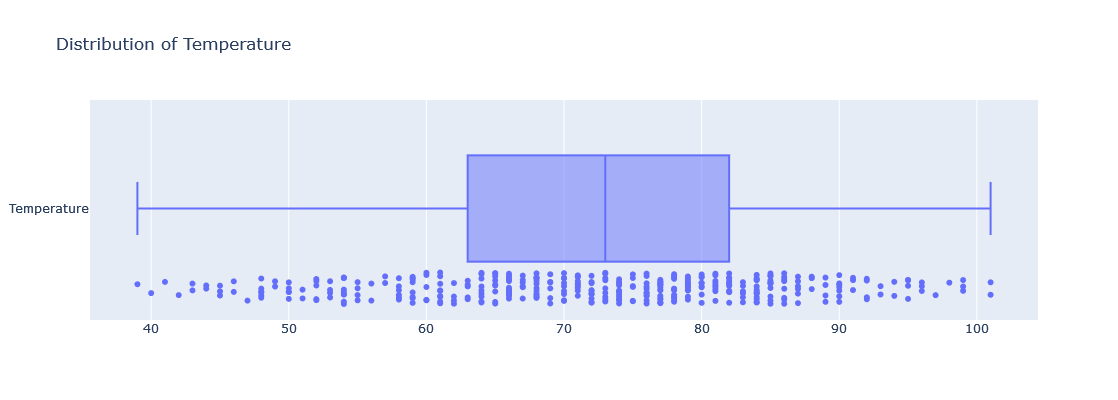

In [37]:
# now plot boxplot
fig = go.Figure()

fig.add_trace(go.Box(x = x, boxpoints = 'all', name = 'Temperature'))
fig.update_layout(title = 'Distribution of Temperature', height = 400)
fig.show()

In [44]:
# find outliers in Temperatures column
# make a list for outliers
outliers = []

# min and max values
min = np.min(x)
max = np.max(x)

# q1, q2, q3
q1 = np.percentile(x, 25)
q2 = np.percentile(x, 50)
q3 = np.percentile(x, 75)


# inter quartile range
iqr = q3 - q1

# upper and lower bound
upper_bound = q3 + iqr*1.5
lower_bound = q1 - iqr*1.5

print('Minimum:', min)
print('Maximum:', max)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

for i in x:
    if (i < lower_bound or i > upper_bound):
        outliers.append(i)

if (len(outliers) == 0):
    print("There are no outliers!")
else:
    print("Outliers:", outliers)  

Minimum: 39
Maximum: 101
Lower Bound: 34.5
Upper Bound: 110.5
There are no outliers!


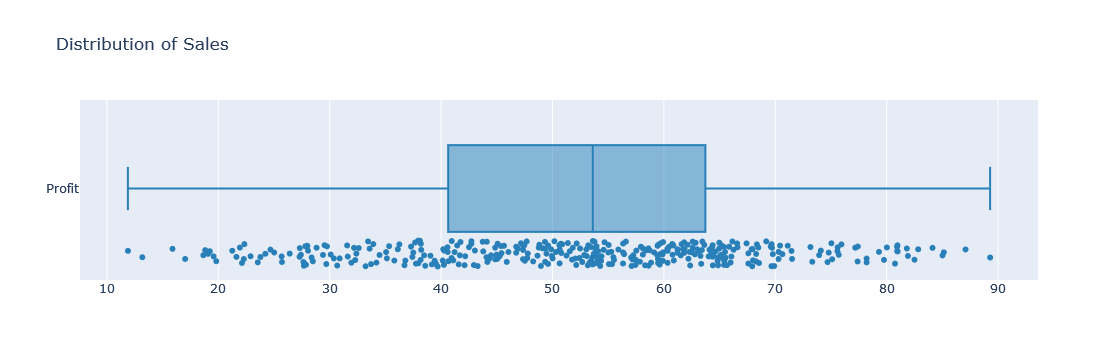

In [49]:
# plot boxplot for sales price
fig = go.Figure()

fig.add_trace(go.Box(x = y, boxpoints = 'all', name = 'Profit', marker = dict(color = '#2980b9')))
fig.update_layout(title = 'Distribution of Sales')
fig.show()

In [50]:
# find outliers in Temperatures column
# make a list for outliers
outliers = []

# min and max values
min = np.min(y)
max = np.max(y)

# q1, q2, q3
q1 = np.percentile(y, 25)
q2 = np.percentile(y, 50)
q3 = np.percentile(y, 75)


# inter quartile range
iqr = q3 - q1

# upper and lower bound
upper_bound = q3 + iqr*1.5
lower_bound = q1 - iqr*1.5

print('Minimum:', min)
print('Maximum:', max)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

for i in y:
    if (i < lower_bound or i > upper_bound):
        outliers.append(i)

if (len(outliers) == 0):
    print("There are no outliers!")
else:
    print("Outliers:", outliers)  

Minimum: 11.88
Maximum: 89.29
Lower Bound: 6.179999999999993
Upper Bound: 98.10000000000001
There are no outliers!
